In [265]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [266]:
import pandas as pd

In [267]:
import lammps_logfile

# Read lammps log

In [272]:
ll_fs=lammps_logfile.File("lammps-grace-fs-dist/log.lammps")

In [274]:
len(ll_fs.partial_logs)

4

In [275]:
df_fs=pd.DataFrame(ll_fs.partial_logs[2])

In [276]:
df_fs.shape

(101, 17)

In [277]:
df_fs.head()

,Step,CPULeft,Temp,PotEng,Fmax,c_min_dist,f_AlLi[2],c_max_gamma,Press,Volume,Density,Pxx,Pyy,Pzz,Pxy,Pxz,Pyz
0,0.0,0.00000,537.87111,-1802.3429,1.628595,2.435473,0.0,0.726912,5498.73530,8558.7111,2.520234,5141.6212,5842.681000,5511.9038,697.75059,353.34569,1067.70500
1,500.0,203.52850,473.69720,-1801.9840,1.547958,2.463640,219.0,0.807184,1990.55710,8590.1024,2.511024,2012.5632,96.714412,3862.3936,200.05452,172.00302,334.49630
2,1000.0,200.88688,487.51934,-1803.6373,1.474431,2.440173,449.0,0.763005,-2838.44630,8639.8395,2.496569,-1349.2416,-2348.142100,-4817.9551,-784.68127,227.49720,-345.27056
3,1500.0,199.05862,515.56549,-1803.0616,1.694432,2.438042,656.0,0.782589,-3283.98860,8659.6685,2.490852,-3627.4014,-2372.367600,-3852.1969,-102.88417,-1210.57210,126.02648
4,2000.0,196.97018,525.03187,-1803.4167,1.598090,2.460482,838.0,0.756066,-952.39407,8621.9558,2.501747,-2065.8751,-2265.149700,1473.8426,-584.47232,930.59402,306.32820


<Axes: >

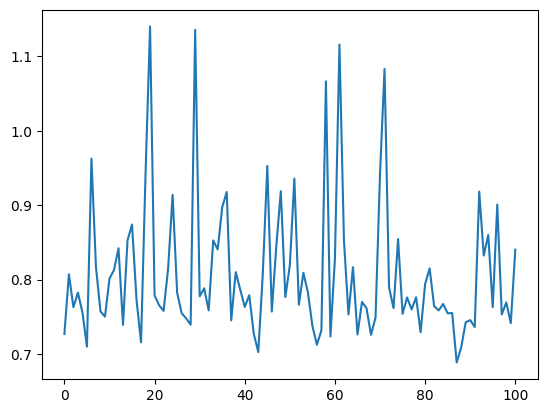

In [278]:
df_fs.c_max_gamma.plot()

In [279]:
ll_2l=lammps_logfile.File("lammps-grace-2L/log.lammps")

In [280]:
df_2l=pd.DataFrame(ll_2l.partial_logs[4])
df_2l.shape

(101, 16)

In [281]:
df_2l.head()

,Step,CPULeft,Temp,PotEng,Fmax,c_min_dist,f_AlLi[2],Press,Volume,Density,Pxx,Pyy,Pzz,Pxy,Pxz,Pyz
0,0.0,0.0000,517.87192,-1802.2196,1.914039,2.427318,0.0,1419.51270,8549.8108,2.522857,2121.86090,829.07305,1307.60430,1560.997100,424.174020,581.428650
1,500.0,1810.5427,507.18118,-1803.4355,1.550492,2.470148,275.0,3022.61670,8522.1027,2.531060,4113.98480,4111.59690,842.26853,-648.318200,-0.230393,803.504430
2,1000.0,1596.8175,487.98195,-1803.4562,1.377522,2.467696,559.0,563.01797,8549.1617,2.523049,-299.55577,1470.17550,518.43419,-8.593780,-186.786380,611.339320
3,1500.0,1504.6875,499.93234,-1802.0556,1.678302,2.400754,827.0,-406.21949,8577.4984,2.514714,1449.52410,1582.25590,-4250.43840,656.269120,-538.375260,35.149269
4,2000.0,1452.7852,498.26043,-1800.4284,1.717663,2.408320,1061.0,-2838.87880,8613.9934,2.504060,-1527.86130,-2993.46040,-3995.31480,88.908514,629.763810,656.590030


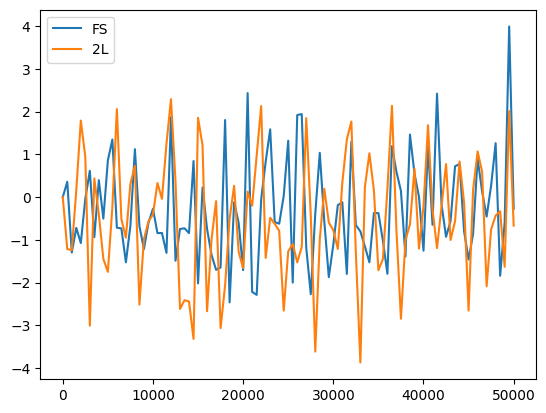

In [282]:
plt.plot(df_fs['Step'], df_fs['PotEng']-df_fs.iloc[0]['PotEng'], label='FS')
plt.plot(df_2l['Step'], df_2l['PotEng']-df_2l.iloc[0]['PotEng'], label='2L')
plt.legend()


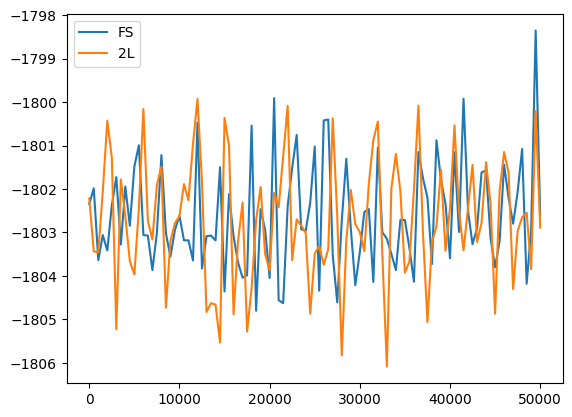

In [285]:
plt.plot(df_fs['Step'], df_fs['PotEng'], label='FS')
plt.plot(df_2l['Step'], df_2l['PotEng'], label='2L')
plt.legend()


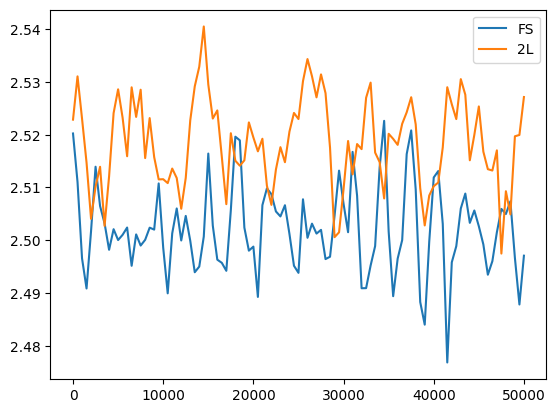

In [286]:
plt.plot(df_fs['Step'], df_fs['Density'], label='FS')
plt.plot(df_2l['Step'], df_2l['Density'], label='2L')
plt.legend()


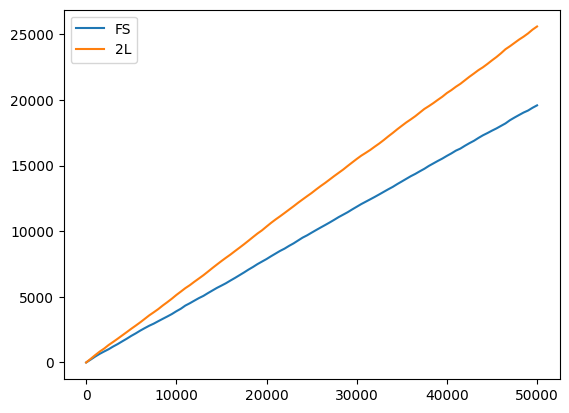

In [287]:
plt.plot(df_fs['Step'], df_fs['f_AlLi[2]'], label='FS')
plt.plot(df_2l['Step'], df_2l['f_AlLi[2]'], label='2L')
plt.legend()


# Manual cross check

In [179]:
import os

In [173]:
import pyace

In [174]:
from tensorpotential.calculator import TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-26 12:09:04.167587: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-26 12:09:08.044066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772104148.810232  156469 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772104149.114201  156469 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772104151.927715  156469 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [181]:
cwd=os.getcwd()

In [182]:
from pyace.asecalc import PyGRACEFSCalculator

In [183]:
potname=f"{cwd}/../3b-distillation/seed/1/saved_model.yaml"
potname=os.path.abspath(potname)
potname

'/home/users/lysogy36/PycharmProjects/GITHUB/grace-tutorial-fresh/3-foundation-models/3b-distillation/seed/1/saved_model.yaml'

In [184]:
calc_fs = PyGRACEFSCalculator(potname)

In [186]:
grace_potname=f"{cwd}/../3a-finetuning/seed/1/final_model/"
grace_potname=os.path.abspath(grace_potname)
grace_potname

'/home/users/lysogy36/PycharmProjects/GITHUB/grace-tutorial-fresh/3-foundation-models/3a-finetuning/seed/1/final_model'

In [187]:
calc_gr = TPCalculator(grace_potname)

2026-02-26 12:15:32.649398: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1772104532.713976  156469 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6579 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:b3:00.0, compute capability: 8.6


read last snapshot

In [188]:
from ase.io import  read

In [194]:
struct_fs = read("lammps-grace-fs-dist/mdmc.lammps-data", style='atomic')

In [195]:
struct_gr = read("lammps-grace-2L/mdmc.lammps-data", style='atomic')

/home/users/lysogy36/.local/share/mamba/envs/grace/lib/python3.11/site-packages/ase/io/lammpsdata.py:51: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(


In [202]:
# FS structure with FS calc
struct_fs.calc=calc_fs
struct_fs.get_potential_energy()

-1839.873945707374

In [199]:
# GRACE-2L structure with FS calc
struct_gr.calc=calc_fs
struct_gr.get_potential_energy()

-1839.0808515850674

In [200]:
# FS structure with GRACE-2L calc
struct_fs.calc=calc_gr
struct_fs.get_potential_energy()

I0000 00:00:1772104695.561242  156469 service.cc:152] XLA service 0x56188d7d1450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772104695.561311  156469 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-26 12:18:19.008165: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772104701.913387  156469 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1772104717.268758  156469 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


-1838.225666762693

In [201]:
# GRACE-2L structure with GRACE-2L calc
struct_gr.calc=calc_gr
struct_gr.get_potential_energy()

-1838.634014566936